# 전처리

In [5]:
import pandas as pd
import re
from datetime import datetime

# path = r'E:\Git Clone\개인 프로젝트\KBS_TEFN\반도체시장_전처리\1_pre_반도체시장_아시아경제.json"

data = pd.read_csv("hanwha.csv", index_col=None)
# data = pd.read_json(path, index_col=None)
data

,content,date,media,title,url
0,NaN,NaN,NaN,NaN,https://sports.news.naver.com/news.nhn?oid=001...
1,[이데일리 정수영 기자] 을미년 새해 초부 건설업계에 칼바람이 불고 있다. 시공능력...,2015.01.01. 오후 5:13,이데일리,연초부터 건설업계 '칼바람'..새해도 악재 '산 넘어 산',https://news.naver.com/main/read.nhn?mode=LSD&...
2,■ 정부 긴급구호대 1명 에볼라 노출 가능성…독일 후송 시에라리온에 파견된 우...,2015.01.02. 오후 8:00,연합뉴스,<연합뉴스 이 시각 헤드라인> - 20:00,https://news.naver.com/main/read.nhn?mode=LSD&...
3,NaN,NaN,NaN,NaN,https://sports.news.naver.com/news.nhn?oid=001...
4,대졸신입 대리 승진보다 6개월 빨라…3명중 1명 임원으로 입사 (서울=연합뉴스...,2015.01.08. 오전 6:11,연합뉴스,"대기업 총수자녀, 28세 입사해 3.5년 만에 임원 승진",https://news.naver.com/main/read.nhn?mode=LSD&...
...,...,...,...,...,...
73287,[이데일리 배진솔 기자] 전국경제인연합회(전경련)은 23일 전경련 회관에서 지난 8...,2020.09.23. 오전 8:40,이데일리,"전경련, 주한베트남 대사만나 '한-베트남 경제협력 증진방안 논의'",https://news.naver.com/main/read.nhn?mode=LSD&...
73288,NaN,NaN,NaN,NaN,https://sports.news.naver.com/news.nhn?oid=001...
73289,[이데일리 전선형 이승현 기자] 회사원 김명은씨는 분통이 터졌다. 최근 은행창구를 ...,2020.09.23. 오전 6:02,이데일리,'보험료 카드납부 왜 안되나'‥10년 묵은 쟁점 다시 도마위,https://news.naver.com/main/read.nhn?mode=LSD&...
73290,(서울=연합뉴스) 서미숙 기자 = 국내 주요 재벌그룹의 오너 일가가 대출을 위해 금...,2020.09.23. 오전 5:31,연합뉴스,오너일가 보유주식의 18%는 은행 소유…담보설정 14조8천억원,https://news.naver.com/main/read.nhn?mode=LSD&...


In [6]:
df = data.dropna()

# df = df.drop_duplicates(['date'])
df["date"] = df.date.str.replace("\. .*", "").str.replace("\.","-")
df["date"] = df.date.astype('datetime64[ns]')
# df = df.set_index("date")
# df = df.sort_index()
df = df.sort_values(by=['date'], axis=0)
df = df.reset_index().drop(["index"], axis=1)
# df

C:\Users\myhome\.conda\envs\nlp\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\myhome\.conda\envs\nlp\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
df["content"] = df["content"].str.replace("\[.+기자\]", "").str.strip()
df["content"] = df["content"].str.replace("[가-힝]{3} \([a-zA-Z0-9]+@[a-zA-Z0-9]+\.co\.kr\)", "").str.strip()
df["content"] = df["content"].str.replace("\([a-zA-Z0-9]+@[a-zA-Z0-9]+\.co\.kr\)", "").str.strip()
df["content"] = df["content"].str.replace("\(.+=연합뉴스\).+기자 =", "").str.strip()
df["content"] = df["content"].str.replace("\(연합뉴스\)", "").str.strip()
df["content"] = df["content"].str.replace("\([가-힣]+=연합뉴스\)", "").str.strip()
df["content"] = df["content"].str.replace("\([가-힣]+ 연합뉴스\)", "").str.strip()
df["content"] = df["content"].str.replace("[a-zA-Z0-9]+@[a-zA-Z0-9]+\.co\.kr", "").str.strip()
df["content"] = df["content"].str.replace("\<저작권자.+금지\>", "").str.strip()
df["content"] = df["content"].str.replace("▲", "").str.strip()
df["content"] = df["content"].str.replace("◇", "").str.strip()
df["content"] = df["content"].str.replace("◆", "").str.strip()
df["content"] = df["content"].str.replace("▷", "").str.strip()
df["content"] = df["content"].str.replace("△", "").str.strip()
df["content"] = df["content"].str.replace("\[이데일리.+\]", "").str.strip()
df["content"] = df["content"].str.replace("\[.+특파원\]", "").str.strip()
df["content"] = df["content"].str.replace("■", "").str.strip()
df["content"] = df["content"].str.replace("○", " ").str.strip()
df["content"] = df["content"].str.replace("ⓝ", " ").str.strip()
df["content"] = df["content"].str.replace("<<.+>>", "").str.strip()
df["content"] = df["content"].str.replace("[0-9]{4}\.[0-9]+\.[0-9]+", "").str.strip()
df["content"] = df["content"].str.replace("문의는.*홈페이지.*\.", "").str.strip()
df["content"] = df["content"].str.replace("☎", "").str.strip()
df["content"] = df["content"].str.replace("[0-9]+-[0-9]+-[0-9]+", "").str.strip()
df["content"] = df["content"].str.replace("www\.[a-zA-Z0-9]+\.co\.kr", "").str.strip()
df["content"] = df["content"].str.replace("\(대표이사.+\)", "").str.strip()
df["content"] = df["content"].str.replace("\\'", "").str.strip()
df["content"] = df["content"].str.replace("\'", "").str.strip()
df["content"] = df["content"].str.replace("\"", "").str.strip()
df["content"] = df["content"].str.replace("‘", "").str.strip()
df["content"] = df["content"].str.replace("’", "").str.strip()
df["content"] = df["content"].str.replace("“", "").str.strip()
df["content"] = df["content"].str.replace("”", "").str.strip()
df["content"] = df["content"].str.replace("=", " ").str.strip()
df["content"] = df["content"].str.replace("--", " ").str.strip()
df["content"] = df["content"].str.replace("http:\/\/www\.[a-zA-Z0-9]+\.com\/", "").str.strip()
df["content"] = df["content"].str.replace("https:\/\/www\.[a-zA-Z0-9]+\.com\/", "").str.strip()
df["content"] = df["content"].str.replace("http:\/\/www\.[a-zA-Z0-9]+\.com", "").str.strip()
df["content"] = df["content"].str.replace("https:\/\/www\.[a-zA-Z0-9]+\.com", "").str.strip()
df["content"] = df["content"].str.replace("www\.[a-zA-Z0-9]+\.com\/[a-zA-Z0-9]+", "").str.strip()
df["content"] = df["content"].str.replace("www\.[a-zA-Z0-9]+\.com", "").str.strip()
df["content"] = df["content"].str.replace("추가 정보:", " ").str.strip()
df["content"] = df["content"].str.replace("자료 제공:", " ").str.strip()
df["content"] = df["content"].str.replace("\[.+금지\]", "").str.strip()
df["content"] = df["content"].str.replace("\(\)", "").str.strip()
df["content"] = df["content"].str.replace("[ ]+", " ").str.strip()

In [2]:
documents = df.content.values.tolist()
documents

In [11]:
# df.iloc[31599].content

df.content[0]

In [9]:
from konlpy.tag import Mecab
mecab = Mecab()

tokenized_docs = df['content'].apply(lambda x: mecab.nouns(x))
tokenized_docs = tokenized_docs.apply(lambda x: [item for item in x if len(item)>1])
tokenized_docs

0        [미년, 새해, 초부, 건설업, 칼바람, 시공, 능력, 평가, 순위, 동부건설, 결...
1        [중화학, 업계, 다사다난, 사고, 안전, 관리, 문제, 도마, 글로벌, 경기, 침...
2        [상반기, 기준, 금리, 추가, 하락, 초저, 금리, 기조, 은행, 만기, 정기예금...
3        [조직, 정비, 전자, 업계, 올해, 안정, 성장, 다지기, 주력, 삼성전자, 스마...
4        [지역, 단장, 동부, 광진, 나주호, 충북, 송정섭, 충남, 임장혁, 무등, 박희...
                               ...                        
34942    [대표, 이사, 내정, 한화, 글로벌, 부문, 김맹윤, 방산, 부문, 김승모, 한화...
34943    [흥국, 증권, 한화, 솔루션, 미국, 수소, 업체, 니콜라, 이슈, 주가, 반영,...
34944    [한화그룹, 한화, 솔루션, 전략, 부문, 김동관, 부사장, 사진, 사장, 승진, ...
34945    [한화그룹, 장단, 인사, 김승연, 한화그룹, 회장, 장남, 김동관, 한화, 솔루션...
34946    [한화그룹, 계열사, 장단, 인사, 단행, 왼쪽, 한화, 글로벌, 부문, 김맹윤, ...
Name: content, Length: 34947, dtype: object

In [13]:
tokenized_docs[0]

# LDA

In [ ]:
from gensim import corpora
from gensim.models import LdaModel, TfidfModel

id2word = corpora.Dictionary(tokenized_docs)
corpus_TDM = [id2word.doc2bow(doc) for doc in tokenized_docs]
tfidf = TfidfModel(corpus_TDM)
corpus_TFIDF = tfidf[corpus_TDM]

n = 100
lda = LdaModel(corpus=corpus_TFIDF, id2word=id2word, num_topics=n, random_state=100)

In [1]:
lda.print_topics(100)

# MalletLDA

## 첫번째 방법

In [11]:
import warnings
warnings.filterwarnings("ignore")

import os
from gensim import corpora
from gensim.models.wrappers import LdaMallet

id2word=corpora.Dictionary(tokenized_docs)
id2word.filter_extremes(no_below = 20) #20회 이하로 등장한 단어는 삭제
texts = tokenized_docs
corpus=[id2word.doc2bow(text) for text in texts]

os.environ['Mallet_HOME'] = 'C:\\Mallet'
mallet_path = 'C:\\Mallet\\bin\\mallet' 
ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=100, id2word=id2word)

In [100]:
ldamallet.print_topics(100)

[(0,
  '0.076*"안전" + 0.053*"사고" + 0.029*"폭발" + 0.028*"관리" + 0.027*"발생" + 0.025*"공장" + 0.023*"작업" + 0.023*"대전" + 0.019*"근로자" + 0.019*"업체"'),
 (1,
  '0.163*"올해" + 0.110*"지난해" + 0.065*"작년" + 0.065*"천억" + 0.045*"기록" + 0.040*"상반기" + 0.028*"증가" + 0.027*"최대" + 0.025*"기준" + 0.023*"이후"'),
 (2,
  '0.034*"아쿠아" + 0.028*"플라" + 0.022*"이벤트" + 0.020*"연휴" + 0.019*"체험" + 0.019*"할인" + 0.017*"진행" + 0.012*"공연" + 0.012*"행사" + 0.010*"추석"'),
 (3,
  '0.227*"금융" + 0.183*"은행" + 0.054*"대출" + 0.036*"우리" + 0.035*"하나" + 0.029*"신한" + 0.024*"카드" + 0.021*"지주" + 0.019*"금리" + 0.017*"담보"'),
 (4,
  '0.012*"산업" + 0.010*"기업" + 0.008*"경제" + 0.008*"마켓" + 0.008*"데일리" + 0.007*"정치" + 0.007*"한국" + 0.007*"부동산" + 0.007*"사설" + 0.007*"다음"'),
 (5,
  '0.044*"수출" + 0.043*"가격" + 0.040*"증가" + 0.038*"대비" + 0.035*"감소" + 0.034*"영향" + 0.034*"수요" + 0.027*"하락" + 0.023*"전망" + 0.021*"상승"'),
 (6,
  '0.081*"브랜드" + 0.054*"갤러리" + 0.025*"백화점" + 0.023*"디자인" + 0.022*"제품" + 0.019*"명품" + 0.018*"월드" + 0.012*"인테리어" + 0.012*"패션" + 0.011*"관계자"'),
 (7,
  '0.060

In [12]:
ldamallet.show_topic(0)

[('안전', 0.0763703594764376),
 ('사고', 0.053343698132235225),
 ('폭발', 0.02918251150282581),
 ('관리', 0.027501733302519066),
 ('발생', 0.026514276109838857),
 ('공장', 0.024938546547051285),
 ('작업', 0.02315271970922537),
 ('대전', 0.022816564069164023),
 ('근로자', 0.019181881211000694),
 ('업체', 0.018971783935962352)]

## 두번째 방법

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
from gensim.models import CoherenceModel
from gensim.models.wrappers import LdaMallet

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
 
    return model_list, coherence_values

In [11]:
import os
from gensim import corpora
from gensim.utils import simple_preprocess

id2word=corpora.Dictionary(data_word)
id2word.filter_extremes(no_below = 20) #20회 이하로 등장한 단어는 삭제
texts = data_word
corpus=[id2word.doc2bow(text) for text in texts]

os.environ['Mallet_HOME'] = 'C:\\Mallet'
mallet_path = 'C:\\Mallet\\bin\\mallet' 

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=100, step=11)

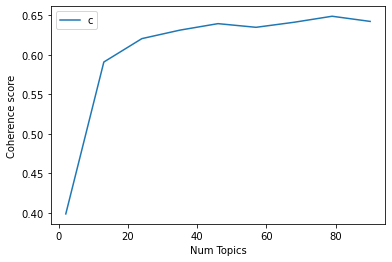

In [12]:
import matplotlib.pyplot as plt

limit=100; start=2; step=11;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [13]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3987
Num Topics = 13  has Coherence Value of 0.5908
Num Topics = 24  has Coherence Value of 0.6204
Num Topics = 35  has Coherence Value of 0.6312
Num Topics = 46  has Coherence Value of 0.6394
Num Topics = 57  has Coherence Value of 0.6347
Num Topics = 68  has Coherence Value of 0.6411
Num Topics = 79  has Coherence Value of 0.6487
Num Topics = 90  has Coherence Value of 0.6422


# Mallet LDA 데이터프레임

In [125]:
def Text_Topic_Count(malletldamodel=ldamallet, topic_num = 0, date = df['date'], texts=texts, documents=documents):
    
    topic_words_list = malletldamodel.show_topic(topic_num, )
    topic_keywords = [word for word, prop in topic_words_list]
    
    text_topic_count = []
    for text in texts:
        sum_topic = 0
        for keyword in topic_keywords:
            sum_topic += text.count(keyword)
        text_topic_count.append(sum_topic)
    
    topic_count_df = pd.DataFrame({'Date': date, 'Documents': documents, 'Topic_Count':text_topic_count})
    
    topic_count_grpd = topic_count_df.groupby('Date')
    Date_count_grpd_df = pd.DataFrame(topic_count_grpd.sum()['Topic_Count'])
    
    
    
    count = 0
    for topic_count in Date_count_grpd.Topic_Count:
        if topic_count != 0:
            count += 1
            
    describing_stock_market = ['주식', '시장', '금융', '주가']
    
    for describing_word in describing_stock_market:
        if describing_word in topic_keywords or count < 80:
            answer = 'Not useful Topic'
            break
        else:
            answer = 'Useful Topic'
    print(answer, end = '')
            
    return topic_count_df, Date_count_grpd_df

In [126]:
for i in range(100):
    print(i, end=' ')
    text_topic_count, Date_count_grpd = Text_Topic_Count(malletldamodel=ldamallet, topic_num = i, date = df['date'], texts=texts, documents=documents)
    print()

0 Useful Topic
1 Useful Topic
2 Useful Topic
3 Not useful Topic
4 Useful Topic
5 Useful Topic
6 Useful Topic
7 Useful Topic
8 Useful Topic
9 Useful Topic
10 Useful Topic
11 Useful Topic
12 Useful Topic
13 Useful Topic
14 Useful Topic
15 Useful Topic
16 Useful Topic
17 Useful Topic
18 Useful Topic
19 Not useful Topic
20 Useful Topic
21 Useful Topic
22 Not useful Topic
23 Not useful Topic
24 Useful Topic
25 Useful Topic
26 Not useful Topic
27 Useful Topic
28 Useful Topic
29 Useful Topic
30 Useful Topic
31 Useful Topic
32 Useful Topic
33 Useful Topic
34 Useful Topic
35 Useful Topic
36 Useful Topic
37 Useful Topic
38 Not useful Topic
39 Useful Topic
40 Useful Topic
41 Useful Topic
42 Useful Topic
43 Useful Topic
44 Useful Topic
45 Useful Topic
46 Useful Topic
47 Useful Topic
48 Useful Topic
49 Useful Topic
50 Useful Topic
51 Useful Topic
52 Useful Topic
53 Useful Topic
54 Useful Topic
55 Not useful Topic
56 Useful Topic
57 Useful Topic
58 Useful Topic
59 Useful Topic
60 Useful Topic
61 Use

In [98]:
text_topic_count

,Date,Documents,Topic_Count
0,2015-01-01,을미년 새해 초부 건설업계에 칼바람이 불고 있다. 시공능력평가 순위 25위인 동부건...,14
1,2015-01-01,중화학 업계는 그야말로 다사다난했던 2014년을 보냈다. 올초부터 잇단 사고 등으로...,17
2,2015-01-01,상반기 기준금리 인하시 추가하락 불가피 초저금리 기조로 은행권 1년 만기 정기예금 ...,3
3,2015-01-01,새롭게 조직을 정비한 전자업계는 올해 안정 속 성장으로 내실 다지기에 주력할 것으로...,8
4,2015-01-01,지역단장 동부광진 나주호 충북 송정섭 충남 임장혁 무등 박희창 포항 박완철,0
...,...,...,...
34942,2020-09-28,대표이사 내정㈜한화(000880) 글로벌부문 김맹윤 방산부문 김승모 한화정밀기계 옥...,0
34943,2020-09-28,흥국증권은 한화솔루션(009830)에 대해 미국 수소차 업체 니콜라 이슈가 주가에 ...,5
34944,2020-09-28,한화그룹은 한화솔루션 전략부문에 김동관 부사장(사진)을 사장으로 승진시키며 신임 대...,0
34945,2020-09-28,28일 한화그룹 사장단 인사에서 김승연 한화그룹 회장의 장남인 김동관 한화솔루션 전...,0


In [99]:
Date_count_grpd

,Topic_Count
Date,
2015-01-01,56
2015-01-02,32
2015-01-03,6
2015-01-04,37
2015-01-05,24
...,...
2020-09-24,65
2020-09-25,20
2020-09-26,1


Useful Topic


In [51]:
from matplotlib import font_manager as fm,rc
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font',family=font_name)

In [52]:
news_date = Date_count_grpd.loc['2015-01-01':'2020-09-28'].index
news_date

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2020-09-19', '2020-09-20', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-26',
               '2020-09-27', '2020-09-28'],
              dtype='datetime64[ns]', name='Date', length=2083, freq=None)

In [53]:
topic_count = Date_count_grpd.loc['2015-01-01':'2020-09-28']['Topic_Count']
topic_count

Date
2015-01-01    21
2015-01-02    31
2015-01-03    11
2015-01-04    30
2015-01-05    21
              ..
2020-09-24    14
2020-09-25     8
2020-09-26     2
2020-09-27    10
2020-09-28    30
Name: Topic_Count, Length: 2083, dtype: int64

In [54]:
import pandas as pd

trading_volume_df = pd.read_csv("trading_volume.csv", index_col = "날짜", parse_dates=True)
trading_volume_df = trading_volume_df.sort_index() # 정렬 sort_values()
trading_volume_df

,거래량
날짜,
2015-01-02,158193
2015-01-05,214547
2015-01-06,182253
2015-01-07,118159
2015-01-08,156524
...,...
2020-09-23,592482
2020-09-24,467569
2020-09-25,330340


In [55]:
trade_date = trading_volume_df.loc['2015-01-01':'2020-09-28'].index
trade_date

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18',
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-28'],
              dtype='datetime64[ns]', name='날짜', length=1413, freq=None)

In [56]:
stock = trading_volume_df.loc['2015-01-01':'2020-09-28']['거래량']
stock

날짜
2015-01-02    158193
2015-01-05    214547
2015-01-06    182253
2015-01-07    118159
2015-01-08    156524
               ...  
2020-09-22    785215
2020-09-23    592482
2020-09-24    467569
2020-09-25    330340
2020-09-28    349886
Name: 거래량, Length: 1413, dtype: int64

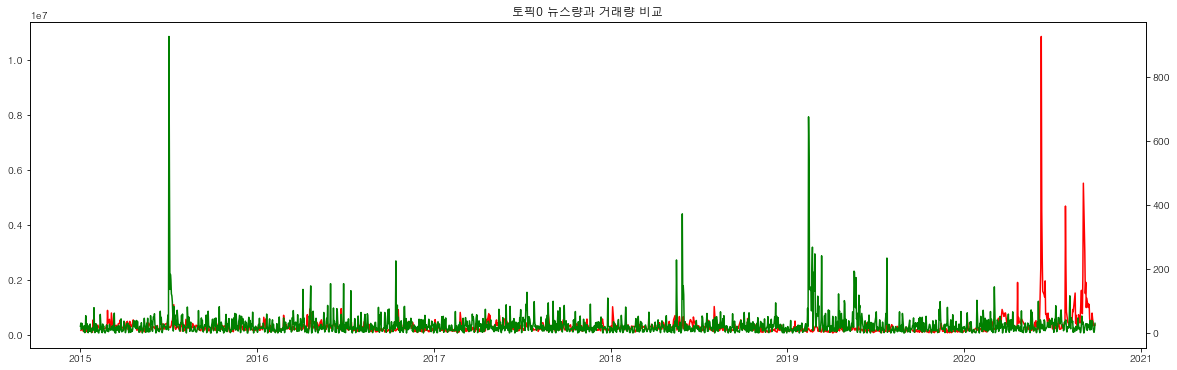

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax0 = plt.subplots(figsize=(20,6))
ax1 = ax0.twinx()

ax0.plot_date(trade_date, stock, '-', color='r')
ax1.plot_date(news_date, topic_count, '-', color='g')
plt.title('토픽{} 뉴스량과 거래량 비교'.format(0)) 
plt.show()

# 시각화

In [10]:
# !pip install pyLDAvis

In [9]:
# import pyLDAvis.gensim
# from gensim.models.wrappers.ldamallet import malletmodel2ldamodel

# pyLDAvis.enable_notebook()
# gensim_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
# pyLDAvis.display(gensim_model)

## 여러 가지 시도들

In [14]:
def format_topics_sentences(malletldamodel=ldamallet, corpus=corpus, texts=documents):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(malletldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = malletldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(malletldamodel=ldamallet, corpus=corpus, texts=documents)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [78]:
# Show
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Date
0,0,41.0,0.2003,"건설, 공사, 수주, 한화건설, 규모, 프로젝트, 건설사, 이라크, 사업, 발주",을미년 새해 초부 건설업계에 칼바람이 불고 있다. 시공능력평가 순위 25위인 동부건...,2015-01-01
1,1,22.0,0.1152,"부문, 경영, 한화그룹, 상무, 사업, 전무, 부사장, 임원, 인사, 전략",중화학 업계는 그야말로 다사다난했던 2014년을 보냈다. 올초부터 잇단 사고 등으로...,2015-01-01
2,2,59.0,0.3199,"금리, 시장, 경기, 미국, 인상, 경제, 증시, 정책, 상승, 전망",상반기 기준금리 인하시 추가하락 불가피 초저금리 기조로 은행권 1년 만기 정기예금 ...,2015-01-01
3,3,22.0,0.3001,"부문, 경영, 한화그룹, 상무, 사업, 전무, 부사장, 임원, 인사, 전략",새롭게 조직을 정비한 전자업계는 올해 안정 속 성장으로 내실 다지기에 주력할 것으로...,2015-01-01
4,4,71.0,0.0699,"서울, 지역, 제주, 부산, 대구, 경남, 광주, 일보, 경제, 울산",지역단장 동부광진 나주호 충북 송정섭 충남 임장혁 무등 박희창 포항 박완철,2015-01-01
...,...,...,...,...,...,...
34942,34942,22.0,0.3084,"부문, 경영, 한화그룹, 상무, 사업, 전무, 부사장, 임원, 인사, 전략",대표이사 내정㈜한화(000880) 글로벌부문 김맹윤 방산부문 김승모 한화정밀기계 옥...,2020-09-28
34943,34943,57.0,0.1774,"연구원, 주가, 투자, 예상, 실적, 전망, 기대, 한화투자증권, 분석, 성장",흥국증권은 한화솔루션(009830)에 대해 미국 수소차 업체 니콜라 이슈가 주가에 ...,2020-09-28
34944,34944,22.0,0.3496,"부문, 경영, 한화그룹, 상무, 사업, 전무, 부사장, 임원, 인사, 전략",한화그룹은 한화솔루션 전략부문에 김동관 부사장(사진)을 사장으로 승진시키며 신임 대...,2020-09-28
34945,34945,22.0,0.1675,"부문, 경영, 한화그룹, 상무, 사업, 전무, 부사장, 임원, 인사, 전략",28일 한화그룹 사장단 인사에서 김승연 한화그룹 회장의 장남인 김동관 한화솔루션 전...,2020-09-28


In [16]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

In [17]:
# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.5188,"시스템, 기술, 드론, 개발, 스마트, 솔루션, 구축, 영상, 활용, 기능",LG유플러스(부회장 하현회)가 드론으로 천연가스 배관망을 감시해 위험을 예방하는 시...
1,1.0,0.6070,"면세점, 롯데, 특허, 사업자, 시내, 갤러리, 신규, 서울, 입찰, 선정",공항 면세점 절반 규모…운영능력·경험 있는 빅3 주목 인천공항 제1 터미널 면세점 ...
2,2.0,0.5204,"북한, 제재, 지원, 대북, 유엔, 남북, 정상, 회담, 국제, 정부",제재 위반 막으면서도 인도적 지원 투명성 강화 위한 것대북제재 주도하는 미국이 초안...
3,3.0,0.7627,"우리, 은행, 추천, 금융, 생명, 지분, 주주, 정부, 매각, 행장",이광구 행장 연임 가능성 커져…지주사 전환도 추진할 듯예보 경영 관여 안 해…공적자...
4,4.0,0.7172,"펀드, 운용, 수익, 주식, 자산, 투자, 자산운용, 채권, 자금, 상품",미래에셋자산운용이 중위험·중수익 성향의 펀드로 3분기 동안 1조원 넘는 자금을 끌어...
...,...,...,...,...
95,95.0,0.2704,"시장, 성장, 점유, 글로벌, 확대, 규모, 경쟁, 진출, 전략, 최근",유로모니터 연평균 16.7%↑…2022년 국내 시장 3분의 1 지난해 국내 궐련형 ...
96,96.0,0.7089,"환경, 배출, 여수, 물질, 대기, 오염, 측정, 관리, 시설, 처리",전남 여수 산업단지 사업장들 적발…4년간 1만3천건 기록부 조작·허위 발급충격적인 ...
97,97.0,0.3644,"문제, 지적, 주장, 입장, 논란, 요구, 정부, 제기, 비판, 해결",한·일 양국이 관계 개선의 최대 걸림돌인 일본군 위안부 문제를 25년 만에 극적으로...
98,98.0,0.6393,"직원, 시간, 임직원, 근무, 업무, 회사, 시행, 운영, 인력, 휴가",삼성전자 선택적 근로시간제 등 도입…다른 기업도 앞다퉈 대비책 내놔 주 52시간 근...


In [18]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
 
# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
 
# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]
 
# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)
 
# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

In [19]:
import pandas as pd
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

pandas version:  1.0.5


In [20]:
# Show
df_dominant_topics.head(500)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,41.0,"건설, 공사, 수주, 한화건설, 규모, 프로젝트, 건설사, 이라크, 사업, 발주",408.0,0.0117
1.0,22.0,"부문, 경영, 한화그룹, 상무, 사업, 전무, 부사장, 임원, 인사, 전략",677.0,0.0194
2.0,59.0,"금리, 시장, 경기, 미국, 인상, 경제, 증시, 정책, 상승, 전망",392.0,0.0112
3.0,22.0,"부문, 경영, 한화그룹, 상무, 사업, 전무, 부사장, 임원, 인사, 전략",192.0,0.0055
4.0,71.0,"서울, 지역, 제주, 부산, 대구, 경남, 광주, 일보, 경제, 울산",727.0,0.0208
5.0,7.0,"회장, 부회장, 그룹, 사장, 재계, 총수, 경영, 김승연, 전경련, 오너",85.0,0.0024
6.0,73.0,"삼성, 노조, 테크윈, 종합, 임금, 화학, 매각, 한화그룹, 토탈, 탈레스",315.0,0.0090
7.0,85.0,"본부, 팀장, 부장, 실장, 지역, 과장, 지원, 센터, 단장, 기획",319.0,0.0091
8.0,73.0,"삼성, 노조, 테크윈, 종합, 임금, 화학, 매각, 한화그룹, 토탈, 탈레스",151.0,0.0043
9.0,58.0,"성장, 혁신, 글로벌, 스타트업, 강화, 전략, 미래, 경쟁력, 지속, 변화",152.0,0.0043


In [56]:
df_dominant_topic['Date'] = df['date']

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Date
0,0,41.0,0.2003,"건설, 공사, 수주, 한화건설, 규모, 프로젝트, 건설사, 이라크, 사업, 발주",을미년 새해 초부 건설업계에 칼바람이 불고 있다. 시공능력평가 순위 25위인 동부건...,2015-01-01
1,1,22.0,0.1152,"부문, 경영, 한화그룹, 상무, 사업, 전무, 부사장, 임원, 인사, 전략",중화학 업계는 그야말로 다사다난했던 2014년을 보냈다. 올초부터 잇단 사고 등으로...,2015-01-01
2,2,59.0,0.3199,"금리, 시장, 경기, 미국, 인상, 경제, 증시, 정책, 상승, 전망",상반기 기준금리 인하시 추가하락 불가피 초저금리 기조로 은행권 1년 만기 정기예금 ...,2015-01-01
3,3,22.0,0.3001,"부문, 경영, 한화그룹, 상무, 사업, 전무, 부사장, 임원, 인사, 전략",새롭게 조직을 정비한 전자업계는 올해 안정 속 성장으로 내실 다지기에 주력할 것으로...,2015-01-01
4,4,71.0,0.0699,"서울, 지역, 제주, 부산, 대구, 경남, 광주, 일보, 경제, 울산",지역단장 동부광진 나주호 충북 송정섭 충남 임장혁 무등 박희창 포항 박완철,2015-01-01
...,...,...,...,...,...,...
34942,34942,22.0,0.3084,"부문, 경영, 한화그룹, 상무, 사업, 전무, 부사장, 임원, 인사, 전략",대표이사 내정㈜한화(000880) 글로벌부문 김맹윤 방산부문 김승모 한화정밀기계 옥...,2020-09-28
34943,34943,57.0,0.1774,"연구원, 주가, 투자, 예상, 실적, 전망, 기대, 한화투자증권, 분석, 성장",흥국증권은 한화솔루션(009830)에 대해 미국 수소차 업체 니콜라 이슈가 주가에 ...,2020-09-28
34944,34944,22.0,0.3496,"부문, 경영, 한화그룹, 상무, 사업, 전무, 부사장, 임원, 인사, 전략",한화그룹은 한화솔루션 전략부문에 김동관 부사장(사진)을 사장으로 승진시키며 신임 대...,2020-09-28
34945,34945,22.0,0.1675,"부문, 경영, 한화그룹, 상무, 사업, 전무, 부사장, 임원, 인사, 전략",28일 한화그룹 사장단 인사에서 김승연 한화그룹 회장의 장남인 김동관 한화솔루션 전...,2020-09-28
